In [4]:
using BenchmarkTools, Statistics, LinearAlgebra, Distributions, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


In [26]:
const N = 10000

const A = ones(N)
const B = ones(N)
C = zeros(N)

@benchmark for i in 1:N
    C[i] = A[i] + B[i]
end

BenchmarkTools.Trial: 9728 samples with 1 evaluation.
 Range (min … max):  307.700 μs …   7.188 ms  ┊ GC (min … max): 0.00% … 93.93%
 Time  (median):     430.150 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   507.612 μs ± 324.954 μs  ┊ GC (mean ± σ):  3.92% ±  6.43%

     ▄████▅                                                      
  ▁▃▅██████▆▄▃▃▃▃▄▃▃▃▄▃▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  308 μs           Histogram: frequency by time         1.31 ms <

 Memory estimate: 304.52 KiB, allocs estimate: 19489.

In [27]:
@benchmark d = a + b

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):   8.100 μs …   3.761 ms  ┊ GC (min … max):  0.00% … 97.85%
 Time  (median):     13.800 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   25.166 μs ± 106.101 μs  ┊ GC (mean ± σ):  15.10% ±  3.65%

   ▂▅██▄▄▃▂▁▁             ▁▂▂▂▃▃▃▂▁                            ▂
  ████████████▇▇▇▇▆▆▆▇▆▅▆█████████████▇▆▆▇▆▇▆▅▆▆▆▅▆▆▅▆▅▄▃▄▄▄▅▄ █
  8.1 μs        Histogram: log(frequency) by time        87 μs <

 Memory estimate: 78.17 KiB, allocs estimate: 2.

In [56]:
function normal(x, mu, sigma)
    p = 1 / sqrt(2 * π * sigma ^ 2)
    p * exp.((-0.5) ./ (sigma ^ 2) * (x .- mu) .^ 2)
end

normal (generic function with 1 method)

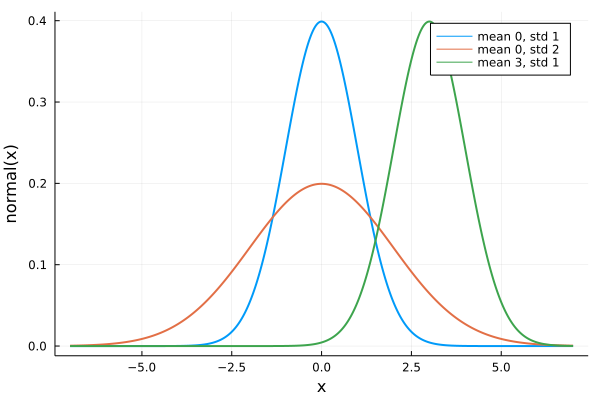

In [151]:
x = Vector{Float64}(-7:0.01:7)

params = [(0, 1), (0, 2), (3, 1)]

d = [("mean $mu, std $sigma") for (mu, sigma) in params] # this produces a Vector which is not accepted as a label, since it has to be a matrix
d = reshape(d, 1, 3) # this reshapes the vector into a matrix

plot(x, [normal(x, mu, sigma) for (mu, sigma) in params], xlabel="x", ylabel="normal(x)", label=d, lw=2)